In [2]:
from cil.framework import ImageGeometry
from cil.utilities.jupyter import islicer
from cil.utilities.display import show2D, show1D, show_geometry
from cil.processors import CentreOfRotationCorrector, TransmissionAbsorptionConverter, RingRemover, Padder, Slicer
from cil.recon import FBP
from cil.io import NEXUSDataWriter
from cil.io.utilities import HDF5_utilities
import numpy as np
import os
import hdf5plugin
from cil.framework import AcquisitionGeometry, AcquisitionData
import matplotlib.pyplot as plt
from tomopy.prep.phase import retrieve_phase
from cil.io import NEXUSDataWriter, NEXUSDataReader

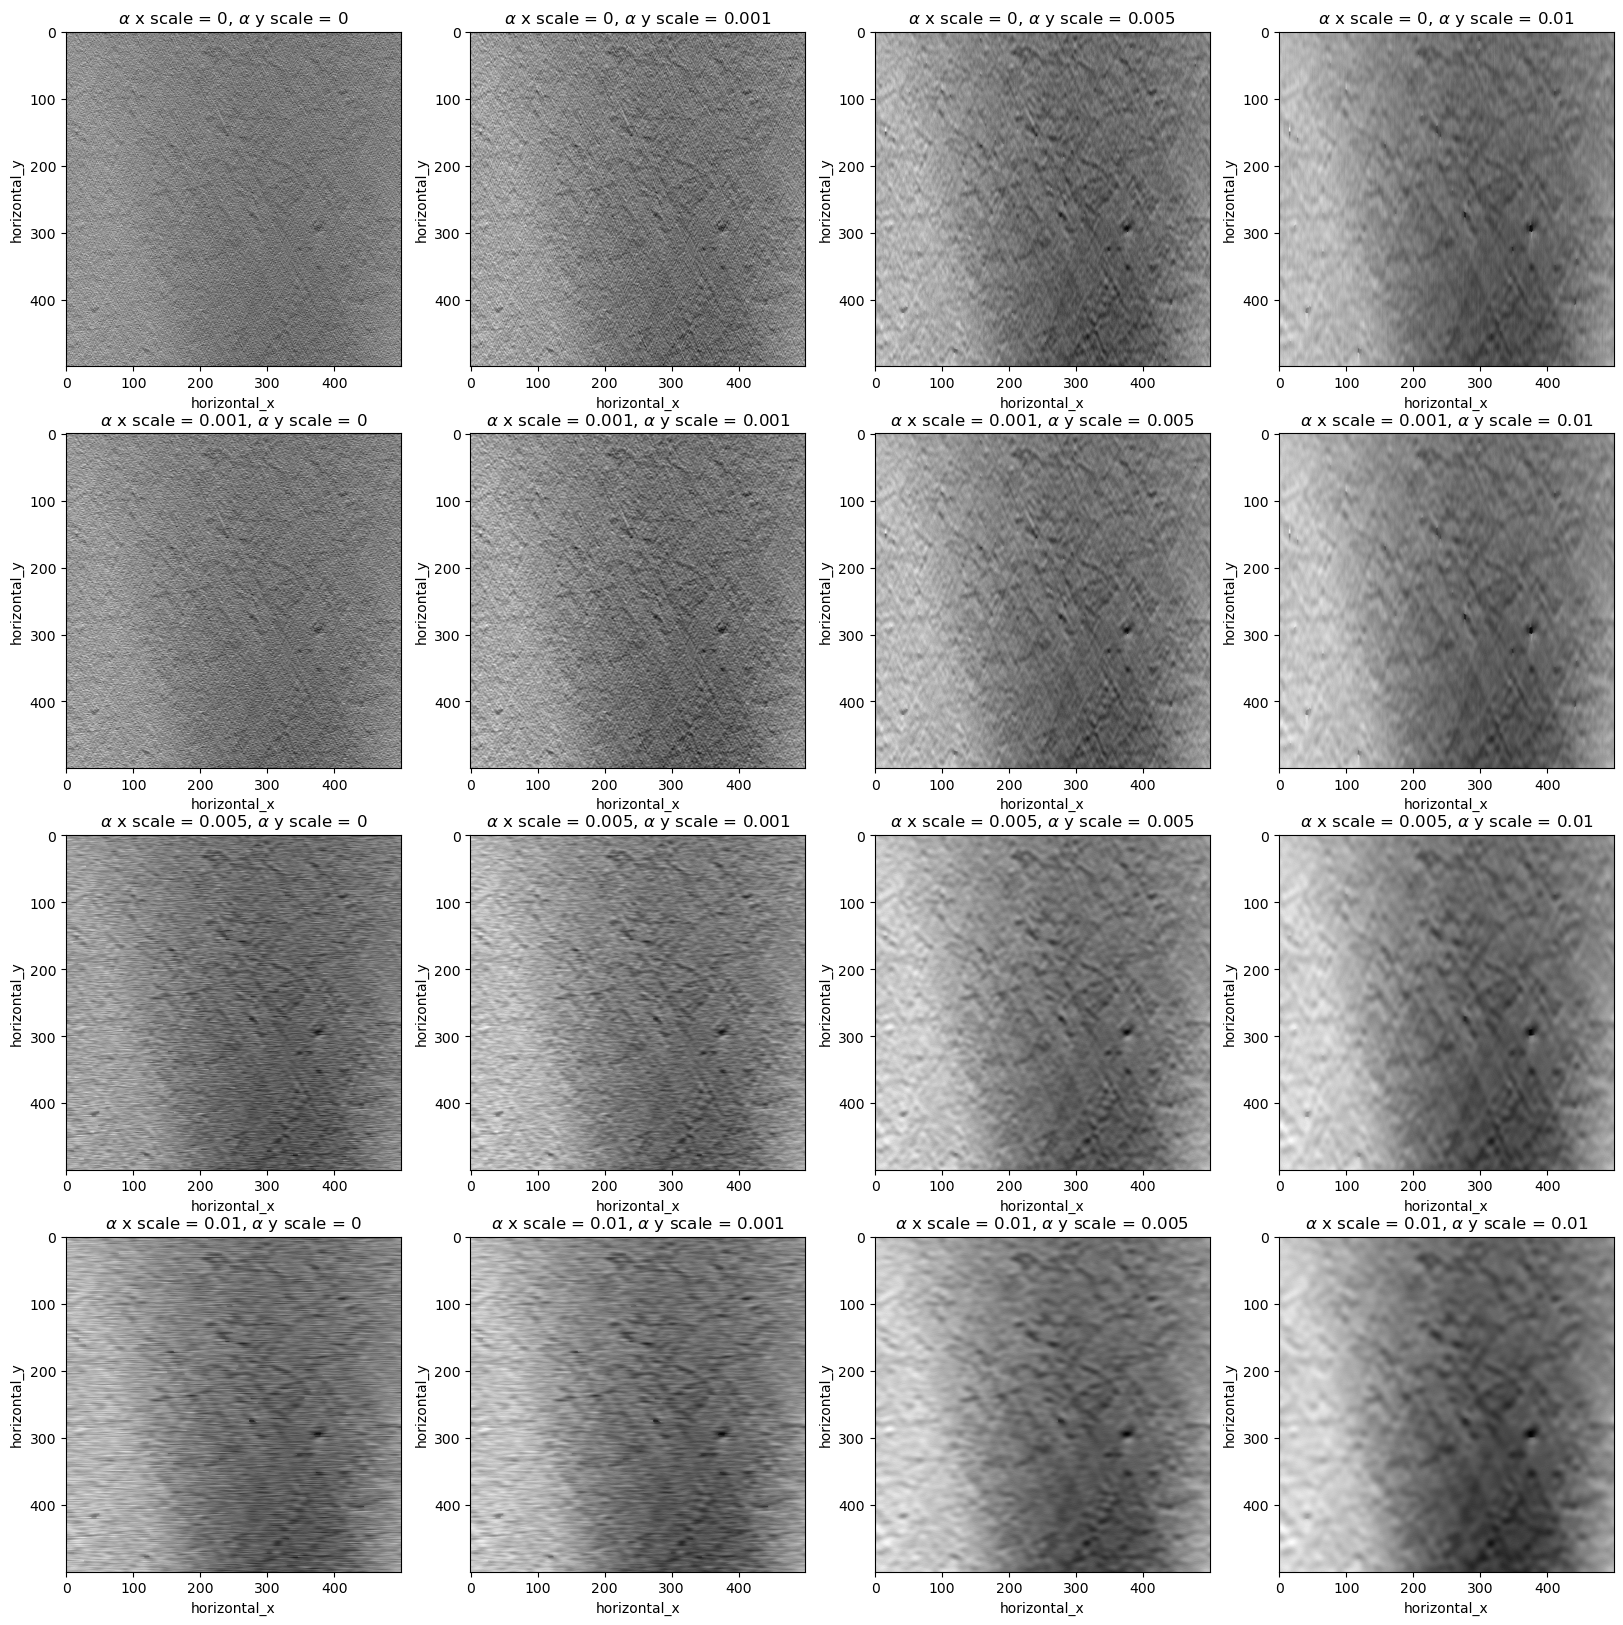

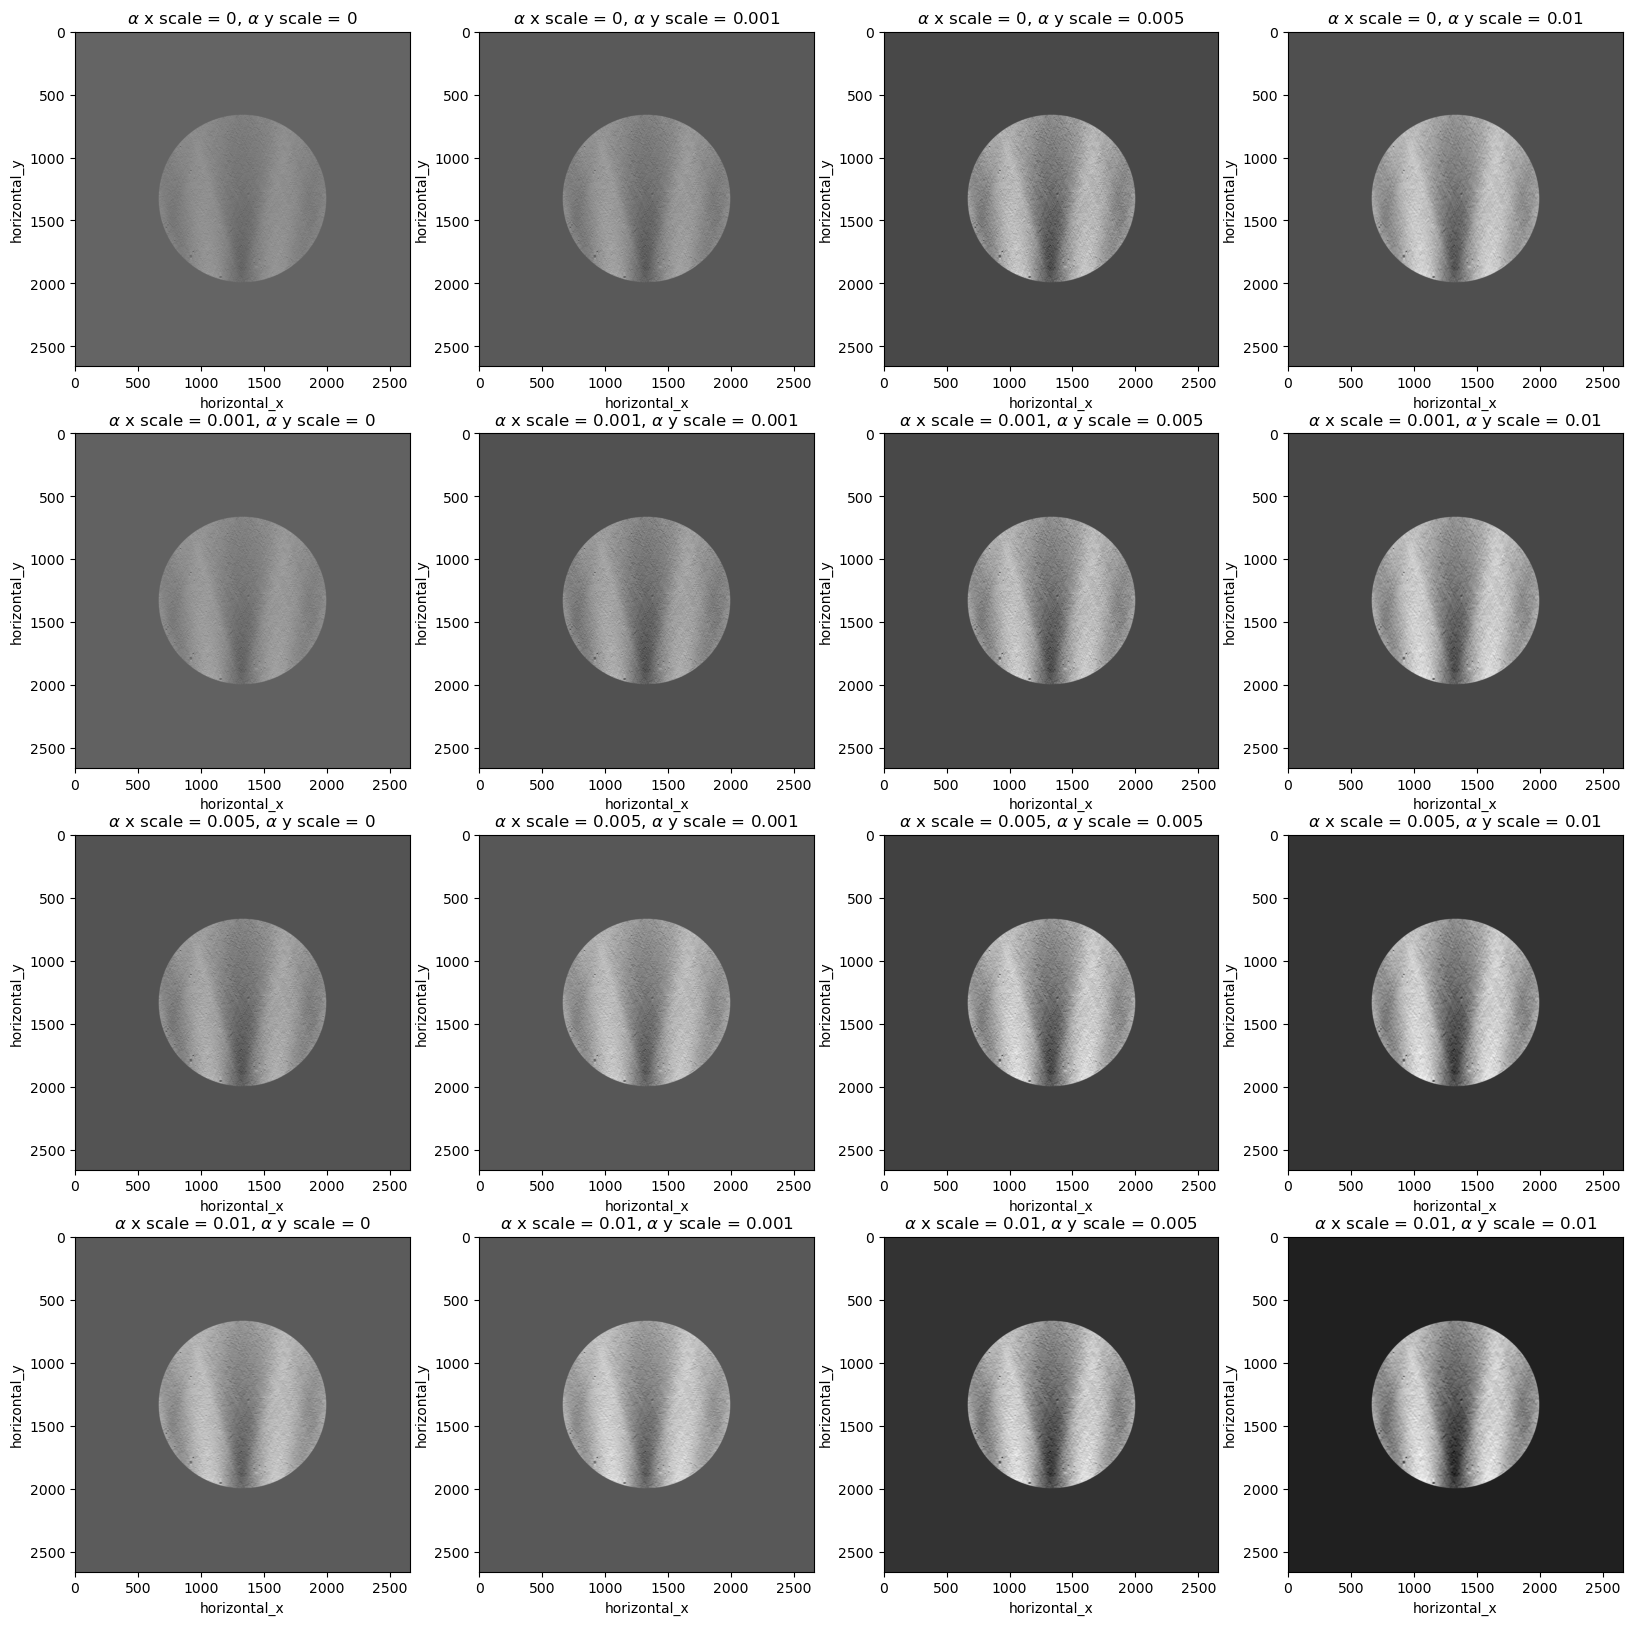

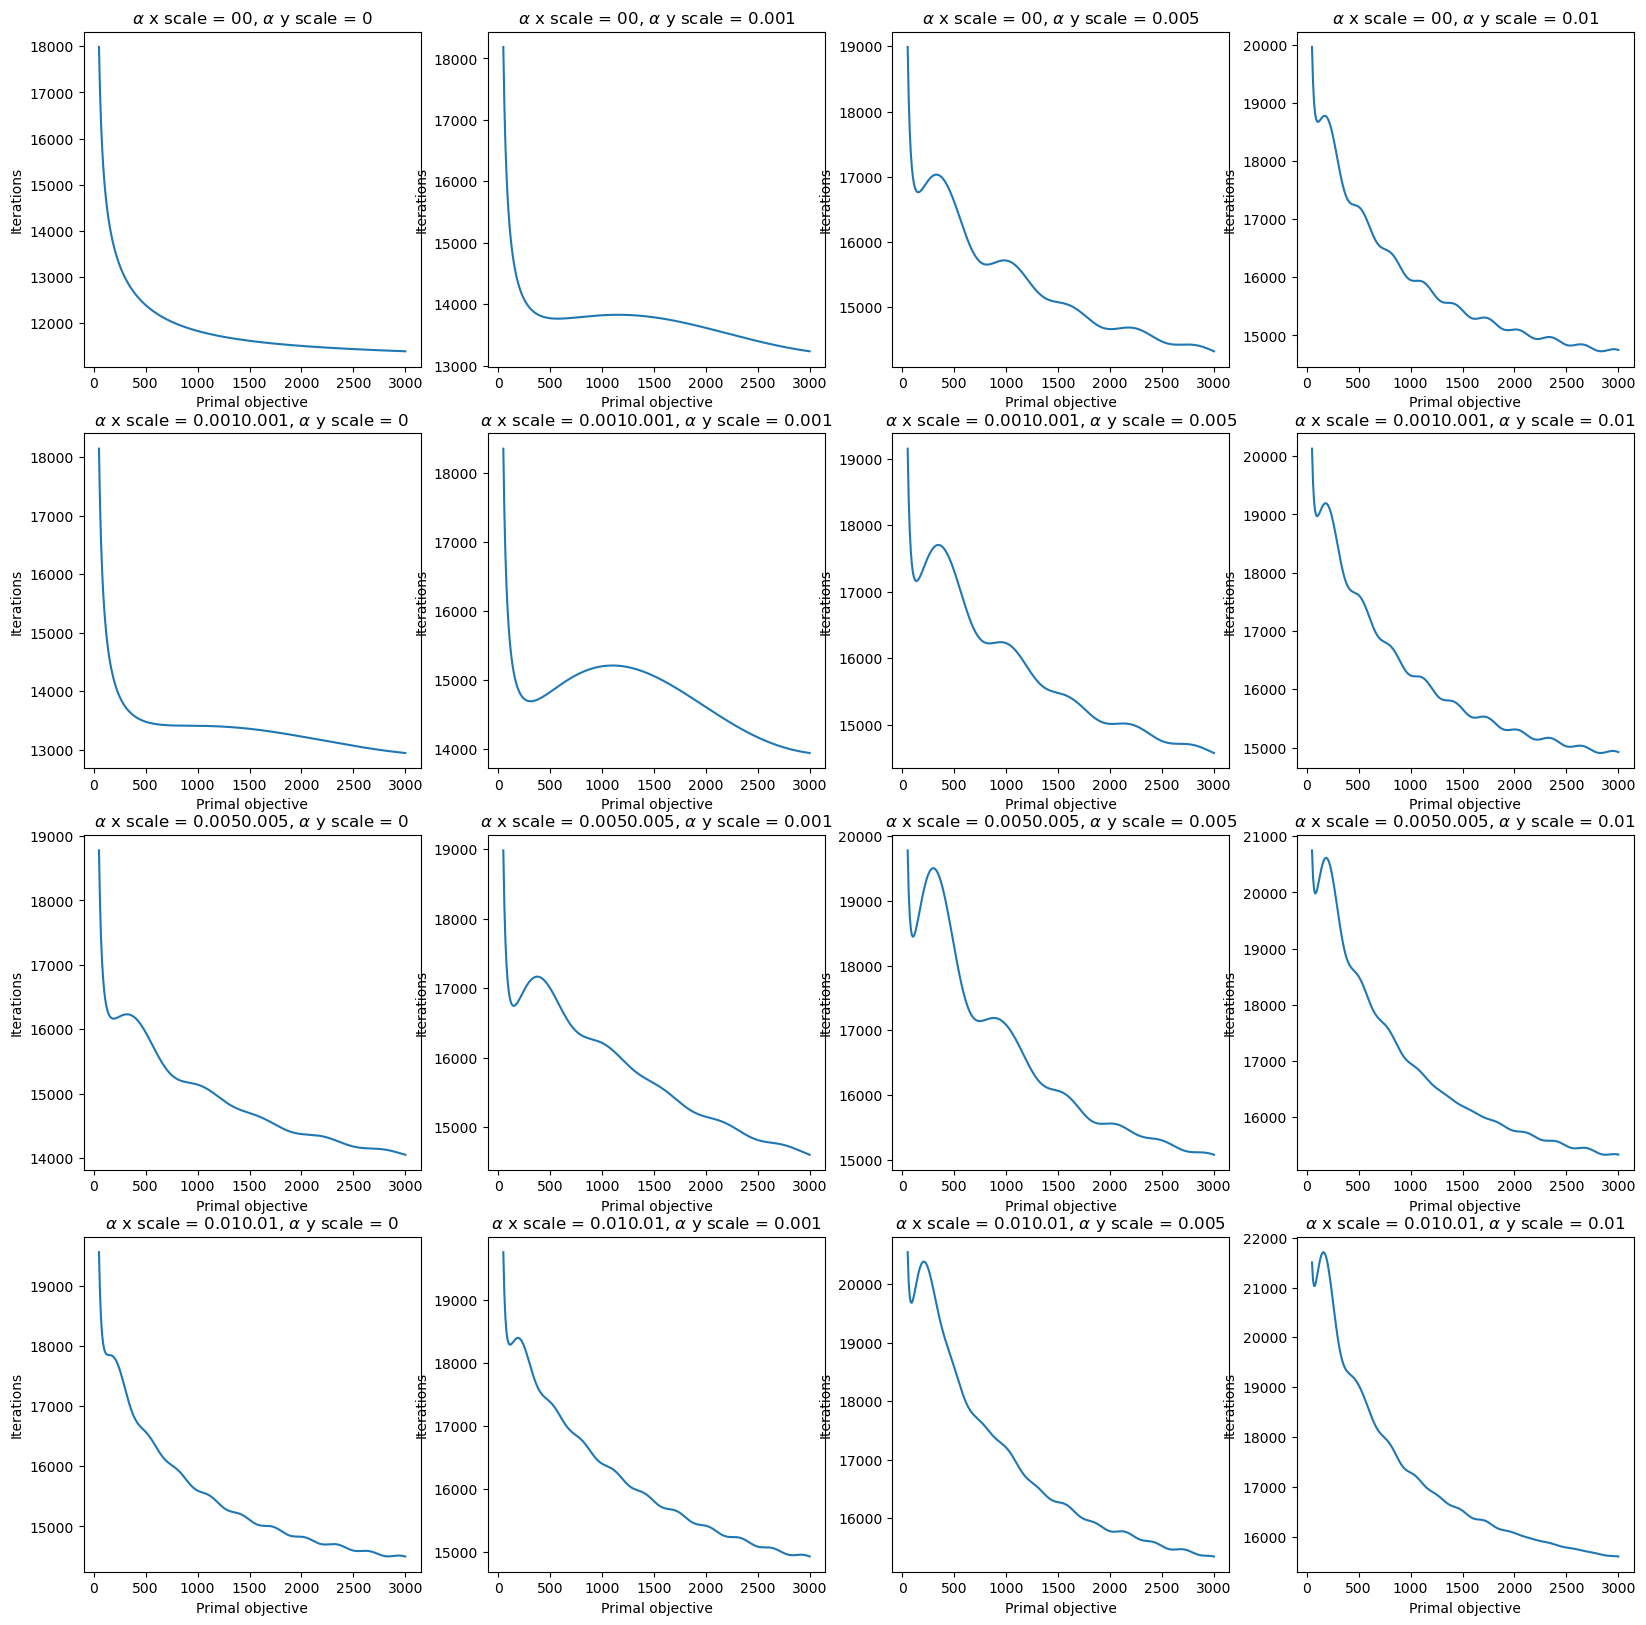

In [4]:
fig, axs = plt.subplots(4,4, figsize=(20,20))
fig2, axs2 = plt.subplots(4,4, figsize=(20,20))
fig3, axs3 = plt.subplots(4,4, figsize=(20,20))
scale_xs = [0, 0.001, 0.005, 0.01]
scale_ys = [0, 0.001, 0.005, 0.01]
i=0
j=0
for scale_x in scale_xs:
    for scale_y in scale_ys:
        file_name='reco_alpha_x_loop'+str(i)+'_y_loop_'+str(j)+'.nxs'
        reader = NEXUSDataReader()
        reader.set_up(file_name=file_name)
        reco = reader.read()

        axs[i,j].imshow(reco.array[1000:1500,1000:1500], cmap='gray')
        axs[i,j].set_title(r'$\alpha$ x scale = ' + str(scale_x) + r', $\alpha$ y scale = ' + str(scale_y))
        axs[i,j].set_xlabel('horizontal_x')
        axs[i,j].set_ylabel('horizontal_y')

        axs2[i,j].imshow(reco.array, cmap='gray')
        axs2[i,j].set_title(r'$\alpha$ x scale = ' + str(scale_x) + r', $\alpha$ y scale = ' + str(scale_y))
        axs2[i,j].set_xlabel('horizontal_x')
        axs2[i,j].set_ylabel('horizontal_y')

        file_name = 'obj_alpha_x_loop'+str(i)+'_y_loop_'+str(j)+'.npy'
        objective = np.load(file_name)
        axs3[i,j].plot(np.arange(5,len(objective))*10, objective[5:len(objective)])
        axs3[i,j].set_title(r'$\alpha$ x scale = ' + str(scale_x) + str(scale_x) + r', $\alpha$ y scale = ' + str(scale_y))
        axs3[i,j].set_xlabel('Primal objective')
        axs3[i,j].set_ylabel('Iterations')
        j=j+1
    j=0
    i=i+1


In [15]:
angles = range(9)
angles


range(0, 9)